## Aufgabe - Spektrale Bilder

Implementieren Sie die mit `#TODO` gekennzeichneten Codestellen und beantworten Sie die mit `#TODO` gekennzeichneten Fragen. Beachten Sie auch die Hinweise unten.

### Teil 1
Vollziehen Sie den Code der Funktion `visualize_fourier_transform` mithilfe der Beschreibung unten nach und beantworten Sie dann die Fragen dazu.

In [42]:
import os

import cv2 as cv
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

def visualize_fourier_transform(img):
    dft = cv.dft(img.astype(np.float), flags=cv.DFT_COMPLEX_OUTPUT)
    dft_real = dft[:, :, 0]
    dft_imaginary = dft[:, :, 1]
    
    mag = cv.magnitude(dft_real, dft_imaginary)
    mag = np.log(mag + 1)
    mag = (mag - mag.min()) / (mag.max() - mag.min())
    
    mag = np.fft.fftshift(mag)
    return mag

dir_resources = '../resources'
imgs = [
    cv.imread(os.path.join(dir_resources, 'rectangle.png'), cv.IMREAD_GRAYSCALE),
    cv.imread(os.path.join(dir_resources, 'Gandalf.jpg'), cv.IMREAD_GRAYSCALE),
    cv.cvtColor(cv.imread(os.path.join(dir_resources, 'Jahrmarkt.jpg')), cv.COLOR_BGR2GRAY)
]

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, img in enumerate(imgs):
    axs[0, i].imshow(img, cmap='gray')
    axs[1, i].imshow(visualize_fourier_transform(img), cmap='gray')

#### Beschreibung: `visualize_fourier_transform`

```
dft = cv.dft(img.astype(np.float), flags=cv.DFT_COMPLEX_OUTPUT)
dft_real = dft[:, :, 0]
dft_imaginary = dft[:, :, 1]
```
Berechnung der Fourierkoeffizienten des Bildes mit der Funktion [cv.dft](https://docs.opencv.org/4.5.0/d2/de8/group__core__array.html#gadd6cf9baf2b8b704a11b5f04aaf4f39d).
Da es sich bei den Koeffizienten um komplexe Zahlen handelt, wird das Ergebnis als zwei Matrizen zurückgegeben.
Eine davon enthält die realen und eine die imaginären koeffizienten.

```
mag = cv.magnitude(dft_real, dft_imaginary)
mag = np.log(mag + 1)
mag = (mag - mag.min()) / (mag.max() - mag.min())
```
Die Funktion [cv.magnitude](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga6d3b097586bca4409873d64a90fe64c3) berechnet für jeden Pixel die Länge der komplexen Zahl (wenn man diese als 2D Vektor auffast).
Das Magnitude Bild beschreibt somit die Amplitude einer bestimmten Schwingung.
Zur Darstellung wird es logarithmisch skaliert und normalisiert.

```
mag = np.fft.fftshift(mag)

```
Die Funktion [np.fft.fftshift](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html) führt eine durch folgendes Bild visualisierte transformation durch:

![](../resources/fftshift_viz.png)

Somit werden die Pixel an den Ecken in den Bildmittelpunkt verschoben.
Die Werte an den Ecken entsprechenden dabei den Fourier-Koeffizienten von Schwinungen niedriger Frequenz.
Diese befinden sich also nach der Transformation in der Bildmitte.

#### Fragen

* Beschreiben Sie die Visualisierungen der Fourierkoeffizienten der drei Bilder oben. Was lässt sich daran ablesen und was bedeuten hohe Werte (weiße Farbe) bzw. niedrige Werte (schwarze Farbe) an unterschiedlichen Positionen?

An der spektralen Bilddarstellung lässt sich ermitteln, durch welche Schwingungen im Frequeenzraum nach der Transforamtion das Bild charakterisert ist. Dabei bestimmt die Farbe der Pixel die Amplitude der Schwingung und die Position des Pixels die Frqeuenz.  Insgesamt gibt es in allen Bildern viele homogene Flächen, sodass nur wenig Frequenzen ausreichen. Da die Übergänge aber auch sehr hart/nicht stetig sind, besagt das Gibbssche Phänomen, dass Überschwingungen auftretten mit hoher Frequenz. Dadurch gibt es auch in den hochfrequentigen Bereichen Aktiviät. 

Beim ersten Bild kann man sehen, dass es nur wenig Frequenzen benötigt um, das Bild im Frequenzraum darzustellen. Das ergibt sich auch der simplen Geometrie, da es nur 4 übergänge gibt, die sich auf einer Ebene befinden. Deshalb reicht eine hohe Aktivtät an einer Linie im Bild jeweils orthogonal zu dem Übergang.

In der vertikalen Ebene ist da Bild identisch zum ersten. Das zweite Bild braucht jedoch mehr Aktiviät in der horziontalen Ebene, da die Linie nicht an einer Bildachse verläuft, sondern nach jedem Pixel sich sowohl in einer anderen i und j Wert befindet. Dadurch ist es logisch, dass es eine größere Anzahl an Frequenzen geben muss, um dieses Muster darstellen zu können. 

Das dritte Bild benötigt auch Frequenzen in alle Richtungen um die Kugel darstellen zu können, da der übergang keine Gerade ist. Deswegen gibt es keine klare Linien, sondern eher eine homogenere Verteilung der Frequenzen.

### Teil 2

Implementieren Sie einen Hochpassfilter im Frequenzraum durch hartes Abschneiden (auf null setzen) von niedrigen Frequenzen.
Implementieren Sie dafür die unten mit `#TODO` gekennzeichnete Codestelle.

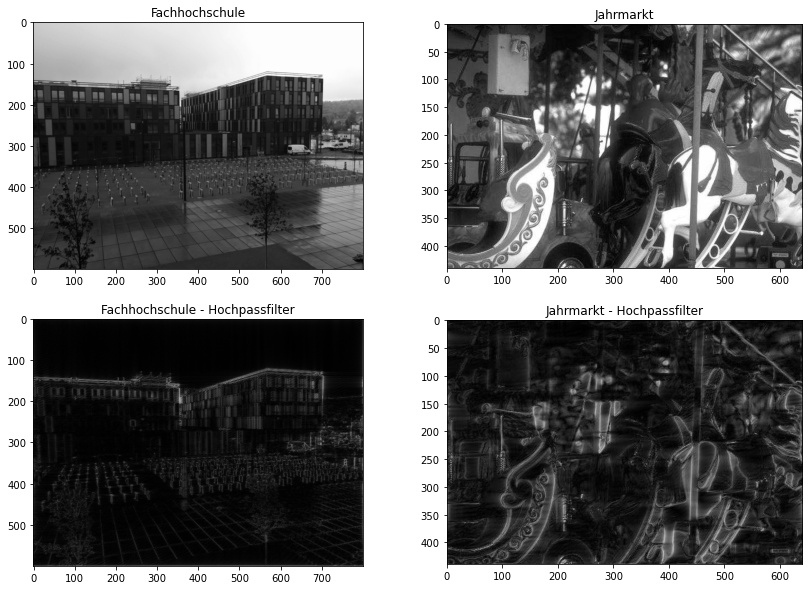

In [28]:
img_fh = cv.imread(os.path.join(dir_resources, 'fh.jpg'), cv.IMREAD_GRAYSCALE)
img_jahrmarkt = cv.imread(os.path.join(dir_resources, 'Jahrmarkt.jpg'), cv.IMREAD_GRAYSCALE)

def cut_low_freq(dft, percentage):
    n_half = dft.shape[0]/2
    m_half = dft.shape[1]/2
    n_border = (dft.shape[0]* percentage)/2 
    m_border = (dft.shape[1]* percentage)/2 
    for m in range(dft.shape[0]):
        for n in range(dft.shape[1]):
            
            if m_border - np.abs(m - m_half) > 0 and n_border - np.abs(n - n_half) > 0 :
                dft[m, n, :] = 0
                
    return dft
    
def to_freq_domain(img):
    dft = cv.dft(img.astype(np.float), flags=cv.DFT_COMPLEX_OUTPUT)
    return np.fft.fftshift(dft)

def to_position_domain(dft):
    dft = np.fft.fftshift(dft)
    res = cv.idft(dft)
    return cv.magnitude(res[:, :, 0], res[:, :, 1])


def highpass_filter(img):
    return to_position_domain(cut_low_freq(to_freq_domain(img), 0.5))

    

fig, axs = plt.subplots(2, 2, figsize = (14, 10))
_ = axs[0, 0].imshow(img_fh, cmap = 'gray')
_ = axs[0, 0].set_title('Fachhochschule')
_ = axs[1, 0].imshow(highpass_filter(img_fh), cmap = 'gray')
_ = axs[1, 0].set_title('Fachhochschule - Hochpassfilter')
_ = axs[0, 1].imshow(img_jahrmarkt, cmap = 'gray')
_ = axs[0, 1].set_title('Jahrmarkt')
_ = axs[1, 1].imshow(highpass_filter(img_jahrmarkt), cmap = 'gray')
_ = axs[1, 1].set_title('Jahrmarkt - Hochpassfilter')

### Teil 3

Implementieren Sie einen Tiefpassfilter im Frequenzraum durch hartes Abschneiden (auf null setzen) von hohen Frequenzen.
Implementieren Sie dafür die unten mit `#TODO` gekennzeichnete Codestelle.

In [29]:
def lowpass_filter(img):
    high_pass = cut_low_freq(to_freq_domain(img), 0.6)
    
    return to_position_domain(to_freq_domain(img) - high_pass)


fig, axs = plt.subplots(2, 2, figsize = (14, 10))
_ = axs[0, 0].imshow(img_fh, cmap = 'gray')
_ = axs[0, 0].set_title('Fachhochschule')
_ = axs[1, 0].imshow(lowpass_filter(img_fh.astype(np.float)), cmap = 'gray')
_ = axs[1, 0].set_title('Fachhochschule - Tiefpassfilter')
_ = axs[0, 1].imshow(img_jahrmarkt, cmap = 'gray')
_ = axs[0, 1].set_title('Jahrmarkt')
_ = axs[1, 1].imshow(lowpass_filter(img_jahrmarkt.astype(np.float)), cmap = 'gray')
_ = axs[1, 1].set_title('Jahrmarkt - Tiefpassfilter')

### Teil 4

In dieser Aufgabe geht es darum verschiedene Filtermasken zu generieren, im Frequenzraum zu visualisieren und anzuwenden.
Implementieren Sie dafür die mit `#TODO` gekennzeichneten Codestellen und beantworten Sie die mit `#TODO` gekennzeichneten Fragen.

#### Hinweise
* Die Funktione `prepare_mask` soll die Maske auf die Größe eine Bildes aufblähen und den Mittelpunkt der Filtermaske auf den Ursprung legen. Diese Transformation ist im Skript durch folgendes Bild illustriert:
![](../resources/prepare_mask.png)
* Orientieren Sie sich für das Erstellen einer Gauß'schen Filtermaske und dessen Invertierung am Skript und benutzen die Hilfsfunktion `pascals_triangle(n)`, welche die n-te Zeile des Pascal'schen Dreiecks berechnet.
* Die Funktione [np.outer](https://numpy.org/doc/stable/reference/generated/numpy.outer.html) ist bei der Berechnung der Gauß'schen Filtermaske ebenfalls hilfreich.

In [30]:
import math

def pascals_triangle(n):
    values = []
    for i in range(n):
        value = math.factorial(n - 1) / (math.factorial(i) * math.factorial(n - 1 - i))
        values.append(value)
    return np.array(values)

print(pascals_triangle(3))
print(pascals_triangle(5))

[1. 2. 1.]
[1. 4. 6. 4. 1.]


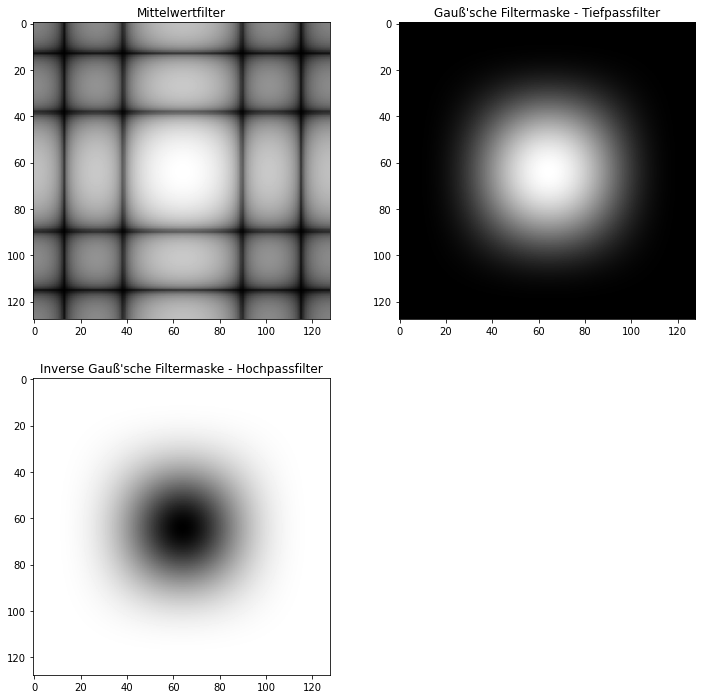

In [31]:
def prepare_mask(filter_mask, shape=(128, 128)):
    mask = np.zeros(shape)
    m = filter_mask.shape[0]
    n = filter_mask.shape[1]
    center_m = int(np.floor(m/2))
    center_n = int(np.floor(n/2))
    bottom_right = filter_mask[center_m:, center_n:]
    mask[:bottom_right.shape[0], :bottom_right.shape[1]] = bottom_right
    top_right = filter_mask[0:center_m, center_n:]
    mask[(mask.shape[0] - top_right.shape[0]):, :top_right.shape[1]] = top_right
    bottom_left = filter_mask[center_m:, 0:center_n]
    mask[:bottom_left.shape[0], (mask.shape[1] - bottom_left.shape[1]):] = bottom_left
    top_left = filter_mask[0:center_m, 0:center_n]
    mask[(mask.shape[0] - top_left.shape[0]):, (mask.shape[1] - top_left.shape[1]):] = top_left
    return mask

def get_mean_mask(size):
    return np.dot(np.ones((size,size)), np.power(size, 2))

def get_gauss_mask(size):
    mask = np.zeros((size, size))
    values = pascals_triangle(size)
    for i in range(size):
        for j in range(size):
            mask[i,j] = values[i] * values[j]
    normalization = 1/np.sum(mask)
    return mask * normalization

def get_gauss_mask_inv(size):
    #get ident
    half = int(np.floor(size/2))
    ident_mask = np.zeros((size,size))
    ident_mask[half, half] = 1
    return np.subtract(ident_mask, get_gauss_mask(size))

prepare_mask(np.array([[1,2,3],[4,5,6],[7,8,9]]))
mask_size = 5

mean_mask = get_mean_mask(mask_size)
gauss_mask = get_gauss_mask(mask_size)
gauss_inv_mask = get_gauss_mask_inv(mask_size)

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
_ = axs[0, 0].imshow(visualize_fourier_transform(prepare_mask(mean_mask)), cmap='gray')
_ = axs[0, 0].set_title('Mittelwertfilter')
_ = axs[0, 1].imshow(visualize_fourier_transform(prepare_mask(gauss_mask)), cmap='gray')
_ = axs[0, 1].set_title('Gauß\'sche Filtermaske - Tiefpassfilter')
_ = axs[1, 0].imshow(visualize_fourier_transform(prepare_mask(gauss_inv_mask)), cmap='gray')
_ = axs[1, 0].set_title('Inverse Gauß\'sche Filtermaske - Hochpassfilter')
_ = axs[1, 1].axis('off')

#### Fragen

* Warum ist das Mitteln aller Pixelwerte (`mean_mask`) keine gute Glättungsoperation?

Wie man sehen kann gibt es keine Gleichmäßige Glättung. Besonders problematisch ist das weit entfernte Pixel wieder strärker gewichtet werde, wohin gehen im mittleren Bereich sogar Pixel negativ gewichtet werden. Das führt zu nicht immer vorhersebaren Effekten und kann die Qualität des Bildes verschlechtern.

* Führen Sie die Codezelle unter dieser aus. Vergleichen Sie die den Mittelwertfilter, den Tiefpassfilter mit Gauß'scher Filtermaske und Ihrer Implementation des Tiefpassfilters durch hartes Abschneiden, sowie die beiden Varianten des Hochpassfilters.

Es ist zu erkennen, dass die Glättung besser bei den Tiefpassfiltern funktioniert als bei dem Mittelwertfilter, da dieses verschwaschener wirkt.Bei dem Vergleich zuwischen den smooth und cutoff, kann nur schwer verglichen werden, da nicht klar ist, wie viel prozent der tiefen/hohen Frequenzen man abschneiden muss um einen ähnlichen Effekt zu erzielen. Denn nur so kann man die Qualität sinnvoll miteinander vergleichen.

In [32]:
def apply_filter(img, filter_mask):
    dft = cv.dft(img.astype(np.float), flags=cv.DFT_COMPLEX_OUTPUT)
    dft = np.fft.fftshift(dft)
    
    mask = prepare_mask(filter_mask, shape=img.shape)
    mask_dft = cv.dft(mask, flags=cv.DFT_COMPLEX_OUTPUT)
    mask_dft = np.fft.fftshift(mask_dft)
    
    mag_mask = cv.magnitude(mask_dft[:, :, 0], mask_dft[:, :, 1])
    mag_mask = np.log(mag_mask + 1)
    mag_mask = (mag_mask - mag_mask.min()) / (mag_mask.max() - mag_mask.min())
    
    dft[:, :, 0] = dft[:, :, 0] * mag_mask
    dft[:, :, 1] = dft[:, :, 1] * mag_mask
    
    dft = np.fft.fftshift(dft)
    res = cv.idft(dft)
    return cv.magnitude(res[:, :, 0], res[:, :, 1])

fig, axs = plt.subplots(3, 2, figsize = (14, 15))
_ = axs[0, 0].imshow(img_fh, cmap = 'gray')
_ = axs[0, 0].set_title('Fachhochschule')

_ = axs[0, 1].imshow(apply_filter(img_fh, get_mean_mask(7)), cmap='gray')
_ = axs[0, 1].set_title('Mittelwertfilter')
_ = axs[1, 0].imshow(lowpass_filter(img_fh), cmap = 'gray')
_ = axs[1, 0].set_title('Tiefpassfilter - Cutoff')
_ = axs[1, 1].imshow(apply_filter(img_fh, get_gauss_mask(21)), cmap='gray')
_ = axs[1, 1].set_title('Tiefpassfilter - Smooth')

_ = axs[2, 0].imshow(highpass_filter(img_fh), cmap='gray')
_ = axs[2, 0].set_title('Hochpassfilter - Cutoff')
_ = axs[2, 1].imshow(apply_filter(img_fh, get_gauss_mask_inv(21)), cmap='gray')
_ = axs[2, 1].set_title('Hochpassfilter - Smooth')

### Teil 5

In dieser Aufgabe geht es um den Rechenaufwand der Berechnung der Fourierkoeffizienten und der Anwendung von Filteroperationen.

####  Teil 5.1
Die Berechnung der Fourierkoeffizienten ist für manche Bildgrößen deutlich schneller als für andere.
Deshalb ergänzt man bei ungünstigen Bildgrößen Nullen am Rand.
Implementieren Sie in der Codezelle unten die mit `#TODO` gekennzeichnete Codestelle um solch ein sog. Zero-Padding durchzuführen.
Nutzen Sie dafür die Funktion [cv.getOptimalDFTSize](https://docs.opencv.org/4.5.0/d2/de8/group__core__array.html#ga6577a2e59968936ae02eb2edde5de299) um die ideale Bildbreite/-höhe herauszufinden und die Funktion [cv.copyMakeBorder](https://docs.opencv.org/4.5.0/d2/de8/group__core__array.html#ga2ac1049c2c3dd25c2b41bffe17658a36) um das Padding durchzuführen.

Führen Sie danach die 2te Codezelle hierunter aus und beantworten Sie dann folgende Frage:
* Um welchen Faktor ist die Fouriertransformation schneller, wenn das Bild eine optimale gegenüber einer schlechten Größe hat?

In etwa um den Faktor 3.

In [10]:
def optimal_dft_size(img):
    padding_in_n = cv.getOptimalDFTSize(img.shape[0]) - img.shape[0]
    padding_in_m = cv.getOptimalDFTSize(img.shape[1]) - img.shape[1]
    return cv.copyMakeBorder(img, 0, padding_in_m, 0, padding_in_n, cv.BORDER_CONSTANT)


img_bad_size = np.zeros((599, 799))
img_optim_size = optimal_dft_size(img_bad_size)

print(f'Optimal size for {img_bad_size.shape} is {img_optim_size.shape}')

Optimal size for (599, 799) is (600, 800)


In [11]:
%timeit cv.dft(img_bad_size, flags=cv.DFT_COMPLEX_OUTPUT)
%timeit cv.dft(img_optim_size, flags=cv.DFT_COMPLEX_OUTPUT)

32.6 ms ± 785 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
12.5 ms ± 411 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### Teil 5.2
Implementieren Sie die Anwendung einer Filtermaske im Ortsraum an der mit `#TODO` gekennzeichneten Codestelle.
Legen Sie dafür die Filtermaske auf jeden Pixel und berechnen Sie die Summe der Produkte der Pixelwerte mit den Werten der Maske.
Ignorieren Sie dabei die Randpixel bei denen die Filtermaske übder die Bildränder hinaus reichen würde.
Das Ergbnis sollte (bis auf die Ränder) genauso aussehen wie die Anwendung der Filter im Frequenzraum.

Führen Sie danach die 2te Codezelle hierunter aus, um den Rechenaufwand zwischen einer Anwendung im Orts- gegen eine Frequenzraum zu untersuchen. 

#### Hinweis
* Wenn Sie die Anwendung eines Filter im Ortsraum nicht naiv implementieren (über den Filter iterieren) sondern Broadcasting von numpy verwenden (`res[i, j] = np.sum[x1:x2, y1:y2] * mask`) ist die Laufzeit fast unabhängig von der Filtergröße

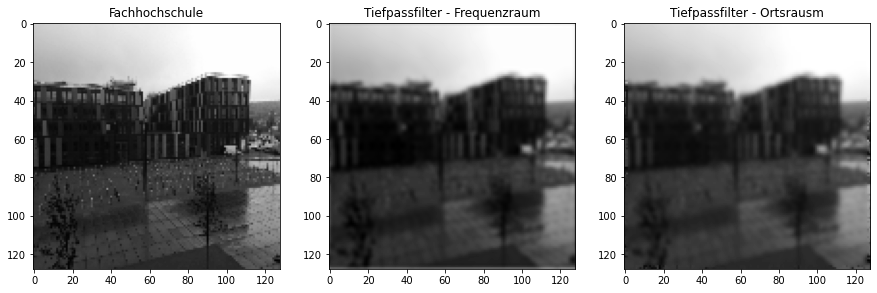

In [33]:
def apply_filter_position_space(img, mask):
    half_n = int(np.floor(mask.shape[0])/2)
    half_m = int(np.floor(mask.shape[1])/2)
    res = img.copy()
    for i in range(half_n, img.shape[0] - half_n):
        for j in range(half_m, img.shape[1] - half_m):
            res[i, j] = np.sum(img[(i - half_n):(i + half_n + 1), (j - half_m):(j + half_m + 1)] * mask)
    
    return res


mask_size = 5
img_small = cv.resize(img_fh, (128, 128))


fig, axs = plt.subplots(1, 3, figsize = (15, 5))
_ = axs[0].imshow(img_small, cmap = 'gray')
_ = axs[0].set_title('Fachhochschule')
_ = axs[1].imshow(apply_filter(img_small, get_gauss_mask(mask_size)), cmap = 'gray')
_ = axs[1].set_title('Tiefpassfilter - Frequenzraum')
_ = axs[2].imshow(apply_filter_position_space(img_small, get_gauss_mask(mask_size)), cmap = 'gray')
_ = axs[2].set_title('Tiefpassfilter - Ortsrausm')

In [34]:
import time

def measure_time(func, *args, repeats=3):
    since = time.time()
    for i in range(repeats):
        func(*args)
    return (time.time() - since) / repeats

filter_mask_sizes = np.arange(3, 12, 2)
times_position_space = np.array(list(map(lambda size: measure_time(apply_filter_position_space, img_small, get_gauss_mask(size)), filter_mask_sizes)))
times_frequency_space = np.array(list(map(lambda size: measure_time(apply_filter, img_small, get_gauss_mask(size)), filter_mask_sizes)))

_ = plt.plot(filter_mask_sizes, times_position_space, label='Position Space')
_ = plt.plot(filter_mask_sizes, times_frequency_space, label='Frequency Space')
_ = plt.xlabel('Filter Mask Size')
_ = plt.ylabel('Time in s')
_ = plt.legend()

### Resourcen
* OpenCV Tutorials:
    * [Discrete Fourier Transform](https://docs.opencv.org/4.5.0/d8/d01/tutorial_discrete_fourier_transform.html)
    * [Fourier Transform](https://docs.opencv.org/4.5.0/de/dbc/tutorial_py_fourier_transform.html)